### Import Libraries

In [118]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Part 1: Data Preprocessing

In [119]:
# from google.colab import drive
# drive.mount('/content/drive')

#### 1.1 Data Loading

Load the dataset to a data frame

In [120]:
# data = pd.read_csv('/content/drive/MyDrive/CS5228/project/train.csv')
data = pd.read_csv("train.csv")
data.head()

,listing_id,title,make,model,description,manufactured,original_reg_date,reg_date,type_of_vehicle,category,...,mileage,omv,arf,opc_scheme,lifespan,eco_category,features,accessories,indicative_price,price
0,1292132,Land Rover Range Rover Velar 3.0A Si6 R-Dynami...,land rover,range,"1 owner, no repairs needed! it looks great, in...",2018.0,NaN,08-mar-2018,suv,parf car,...,96000.0,88906.0,132031.0,NaN,NaN,uncategorized,3l supercharged v6 p380 engine at 375bhp/450nm...,"2 x massage/memory/cooling & warmer seat, rear...",NaN,193788.0
1,1294696,Mercedes-Benz C-Class C200 Sport Premium Sunroof,mercedes-benz,c200,rare beautiful white c200 sport premium sunroo...,2017.0,NaN,28-dec-2017,luxury sedan,"parf car, premium ad car",...,85680.0,40678.0,43950.0,NaN,NaN,uncategorized,"2.0l 4 cylinders inline turbocharged engine, p...","multi function steering, electric tailgate, re...",NaN,96800.0
2,1311717,Honda Odyssey 2.4A (COE till 09/2027),honda,odyssey,comes with warranty. full service done.,2007.0,NaN,19-sep-2007,mpv,"coe car, premium ad car, low mileage car",...,138000.0,27994.0,30794.0,NaN,NaN,uncategorized,"2.4l k24a 4 cylinders inline dohc i-vtec, 5 sp...","cruise control, touchscreen audio, reverse cam...",NaN,39800.0
3,1310068,Toyota Corolla Altis 1.6A (COE till 12/2028),toyota,altis,0,2008.0,NaN,15-dec-2008,mid-sized sedan,"coe car, premium ad car",...,160000.0,16084.0,16084.0,NaN,NaN,uncategorized,super fuel efficient 1.6l 16 valves dohc vvt-i...,"leather seats, pioneer dvd audio system with r...",NaN,44800.0
4,1325280,Lexus GS300 (COE till 06/2026),lexus,gs,wear and tear done up. well maintained and reg...,2006.0,NaN,22-dec-2006,luxury sedan,"coe car, premium ad car",...,183000.0,50414.0,55456.0,NaN,NaN,uncategorized,"powerful 3.0l v6 engine, 227bhp, 6 speed , key...",premium upholstery electric seats. memory seat...,NaN,25800.0


1.2 Data Overview

View data dimensions:


In [121]:
print(f"The dataset has {data.shape[0]} rows and {data.shape[1]} columns.")

The dataset has 25000 rows and 30 columns.


Get data types and non-null counts:

1.3 Data Information

Get data types and non-null counts:

In [122]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   listing_id         25000 non-null  int64  
 1   title              25000 non-null  object 
 2   make               23684 non-null  object 
 3   model              25000 non-null  object 
 4   description        24320 non-null  object 
 5   manufactured       24993 non-null  float64
 6   original_reg_date  255 non-null    object 
 7   reg_date           25000 non-null  object 
 8   type_of_vehicle    25000 non-null  object 
 9   category           25000 non-null  object 
 10  transmission       25000 non-null  object 
 11  curb_weight        24693 non-null  float64
 12  power              22360 non-null  float64
 13  fuel_type          5879 non-null   object 
 14  engine_cap         24404 non-null  float64
 15  no_of_owners       24982 non-null  float64
 16  depreciation       244

1.4 Basic Statistics

Statistics for numerical features:

In [123]:
data.describe()

,listing_id,manufactured,curb_weight,power,engine_cap,no_of_owners,depreciation,coe,road_tax,dereg_value,mileage,omv,arf,indicative_price,price
count,2.500000e+04,24993.000000,24693.000000,22360.000000,24404.000000,24982.000000,24493.000000,25000.000000,22368.000000,2.478000e+04,1.969600e+04,24936.000000,2.482600e+04,0.0,2.500000e+04
mean,1.299377e+06,2015.645181,1580.784109,140.908095,2059.310441,2.289328,20466.481444,48935.722720,1462.160899,4.603714e+04,8.593014e+04,41464.935274,4.472783e+04,NaN,1.151486e+05
std,3.507003e+04,5.723515,837.961160,81.675265,1073.197922,1.489925,19768.630796,21584.778467,1377.161884,6.135528e+04,5.162519e+04,48374.987804,7.911383e+04,NaN,1.555725e+05
min,3.652410e+05,1939.000000,435.000000,0.000000,0.000000,1.000000,1770.000000,2605.000000,50.000000,1.100000e+01,1.000000e+00,426.000000,2.300000e+01,NaN,7.000000e+02
25%,1.291592e+06,2014.000000,1295.000000,90.000000,1496.000000,1.000000,13430.000000,35001.000000,684.000000,1.814300e+04,5.032475e+04,19990.000000,1.364600e+04,NaN,4.914100e+04
50%,1.308018e+06,2017.000000,1480.000000,111.000000,1797.000000,2.000000,15850.000000,45289.000000,1107.000000,2.896800e+04,8.400000e+04,28480.000000,2.524100e+04,NaN,7.888800e+04
75%,1.321186e+06,2019.000000,1700.000000,155.000000,2151.000000,3.000000,20780.000000,55889.000000,1630.000000,5.173025e+04,1.160000e+05,42373.250000,4.565275e+04,NaN,1.258000e+05
max,1.332660e+06,2024.000000,25620.000000,735.000000,15681.000000,6.000000,607730.000000,158004.000000,12375.000000,1.114652e+06,1.290000e+06,811764.000000,1.491920e+06,NaN,2.899999e+06


Statistics of classification characteristics:

In [124]:
data.describe(include=["O"])

,title,make,model,description,original_reg_date,reg_date,type_of_vehicle,category,transmission,fuel_type,opc_scheme,lifespan,eco_category,features,accessories
count,25000,23684,25000,24320,255,25000,25000,25000,25000,5879,162,2329,25000,24157,21187
unique,7263,95,799,19765,219,4705,11,245,2,5,3,1482,1,16769,16939
top,Honda Vezel 1.5A X,toyota,amg,0,01-jan-1983,31-mar-2017,suv,"parf car, premium ad car",auto,diesel,revised opc scheme . learn more about opc sche...,29-mar-2043,uncategorized,view specs of the toyota hiace,all vehicles have gone through a rigorous 160 ...
freq,296,3150,809,1497,5,52,5905,4935,23301,2586,155,12,25000,228,621


2.1 Checking Missing Values

Calculate the number and proportion of missing values for each feature:

In [125]:
missing_values = data.isnull().sum().sort_values(ascending=False)
missing_percentage = (missing_values / data.shape[0]) * 100
missing_data = pd.concat(
    [missing_values, missing_percentage], axis=1, keys=["Missing Values", "Percentage"]
)
missing_data

,Missing Values,Percentage
indicative_price,25000,100.000
opc_scheme,24838,99.352
original_reg_date,24745,98.980
lifespan,22671,90.684
fuel_type,19121,76.484
mileage,5304,21.216
accessories,3813,15.252
power,2640,10.560
road_tax,2632,10.528
make,1316,5.264


2.2 Visualizing missing values

Heat map shows missing value location:

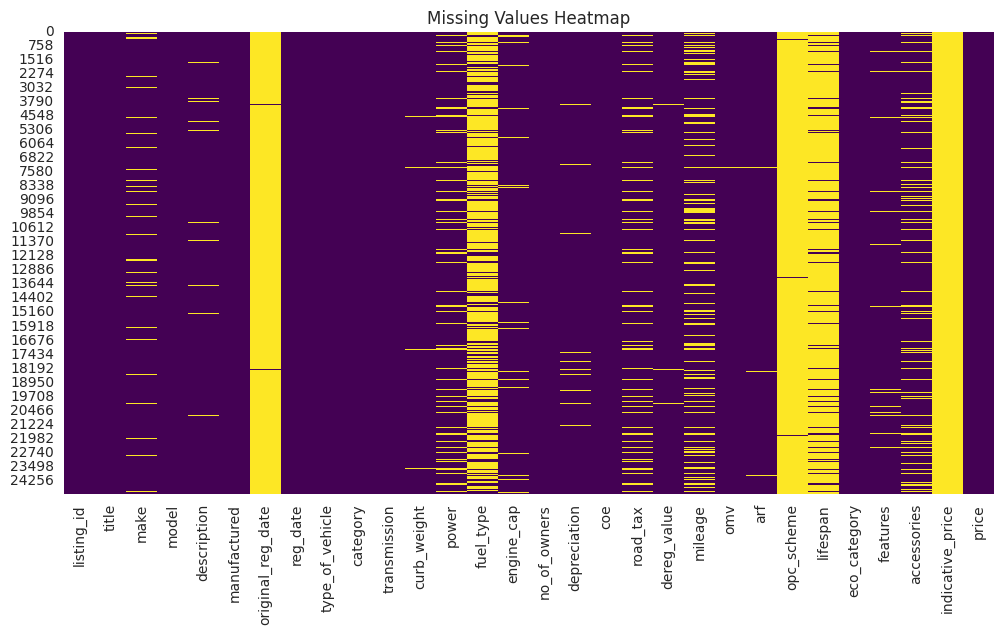

In [126]:
plt.figure(figsize=(12, 6))
sns.heatmap(data.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values Heatmap")
plt.show()

*3.1* Numerical Characteristics

Data visualization analysis:

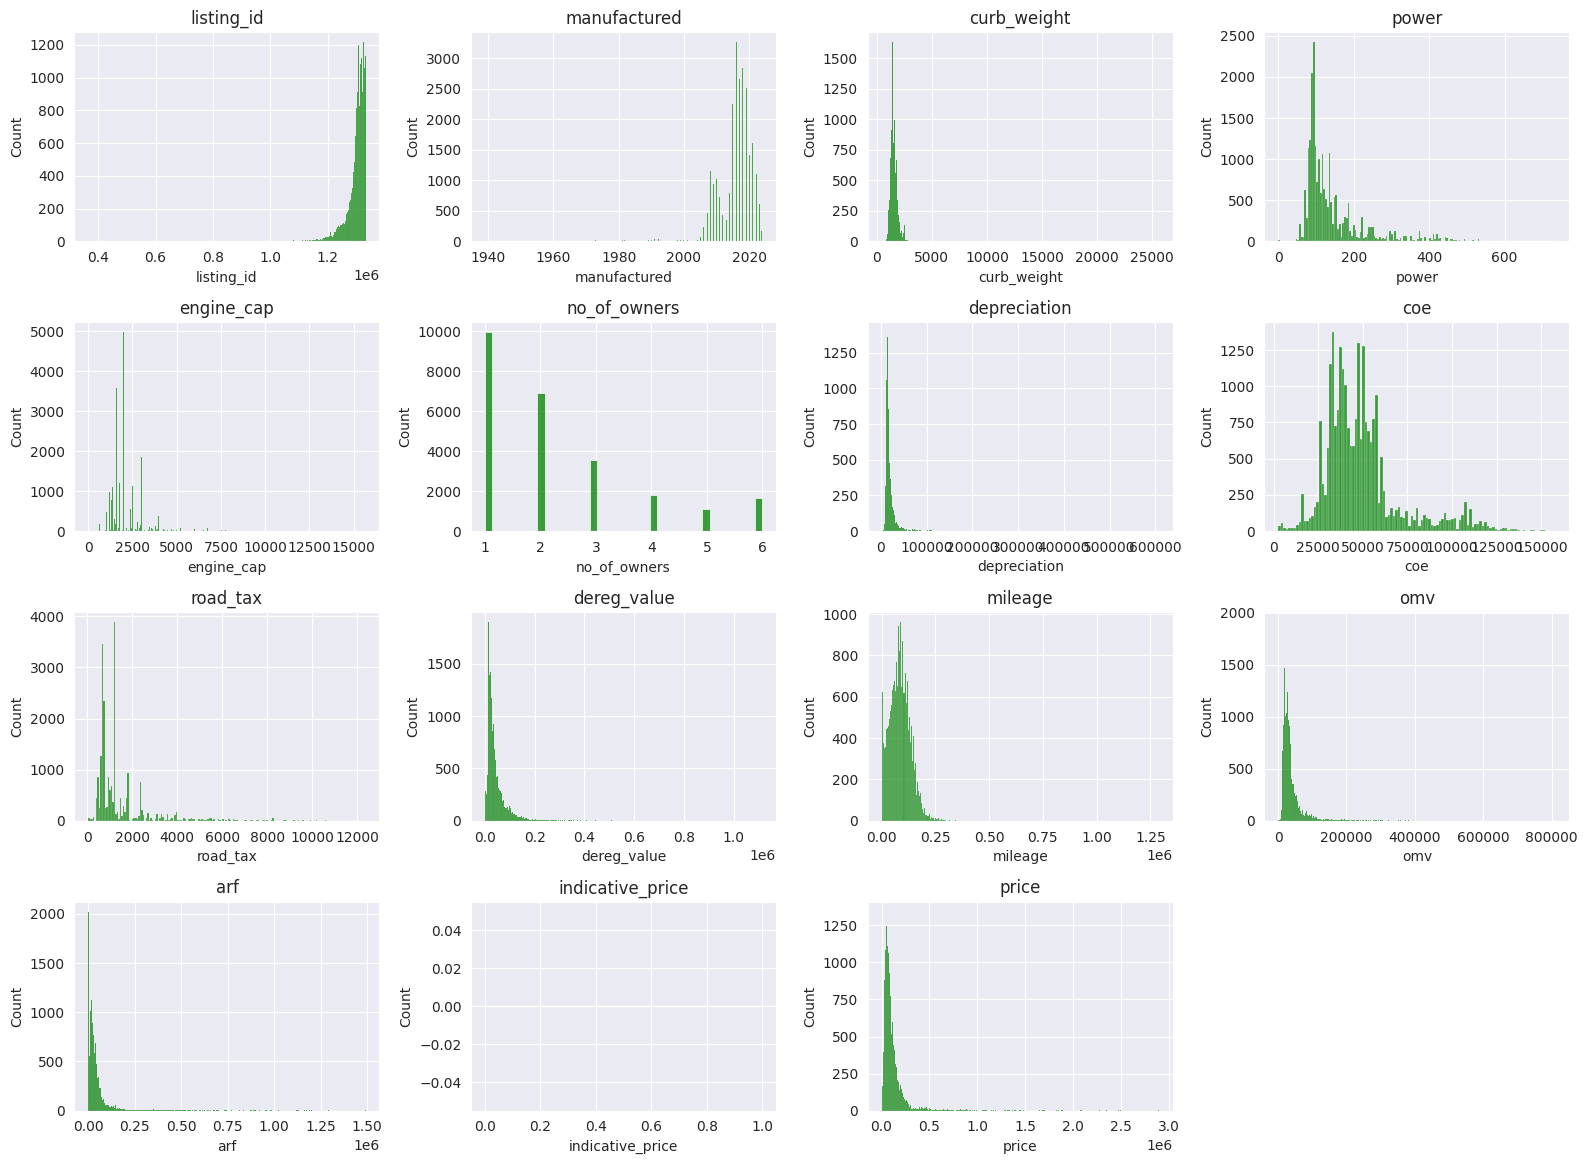

In [127]:
sns.set_style("darkgrid")
plt.figure(figsize=(16, 20))

numeric_columns = data.select_dtypes(include=["int64", "float64"]).columns.tolist()

for i, col in enumerate(numeric_columns, 1):
    plt.subplot(7, 4, i)
    sns.histplot(data[col], color="Green")
    plt.title(col)

plt.tight_layout()
plt.show()

Plot histograms and box plots:

Column 'indicative_price' is empty after dropping NaNs.


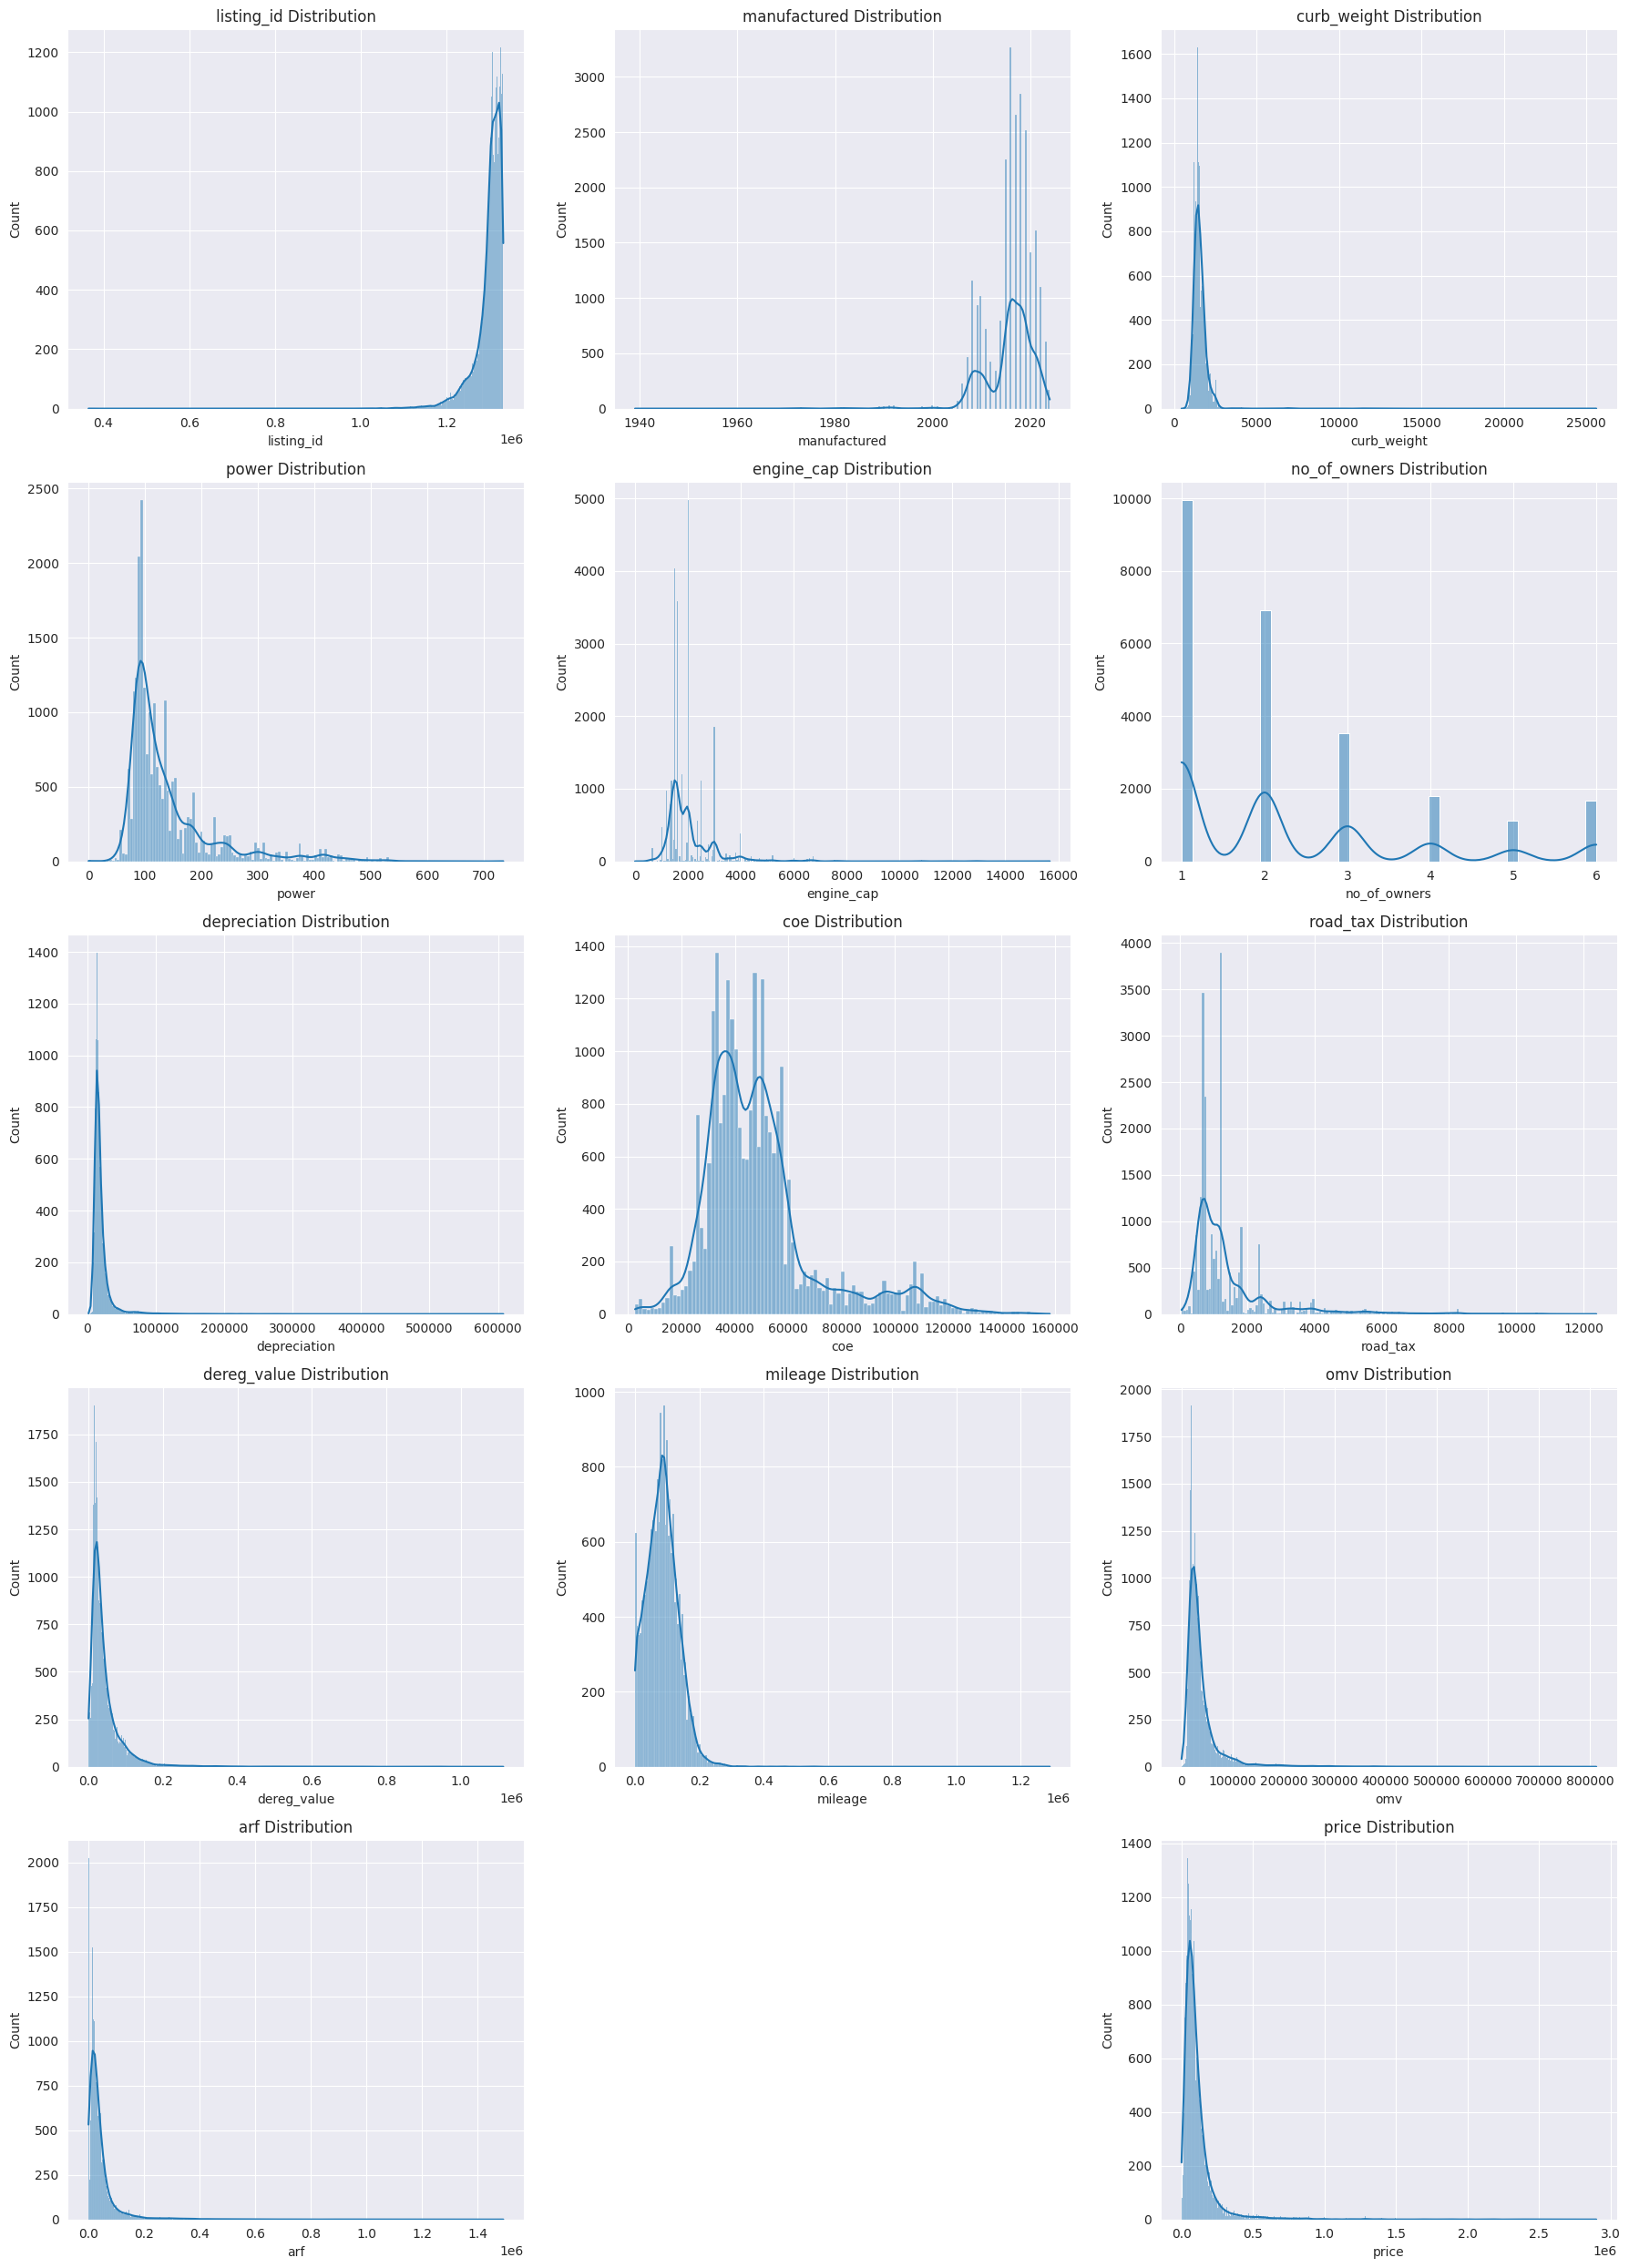

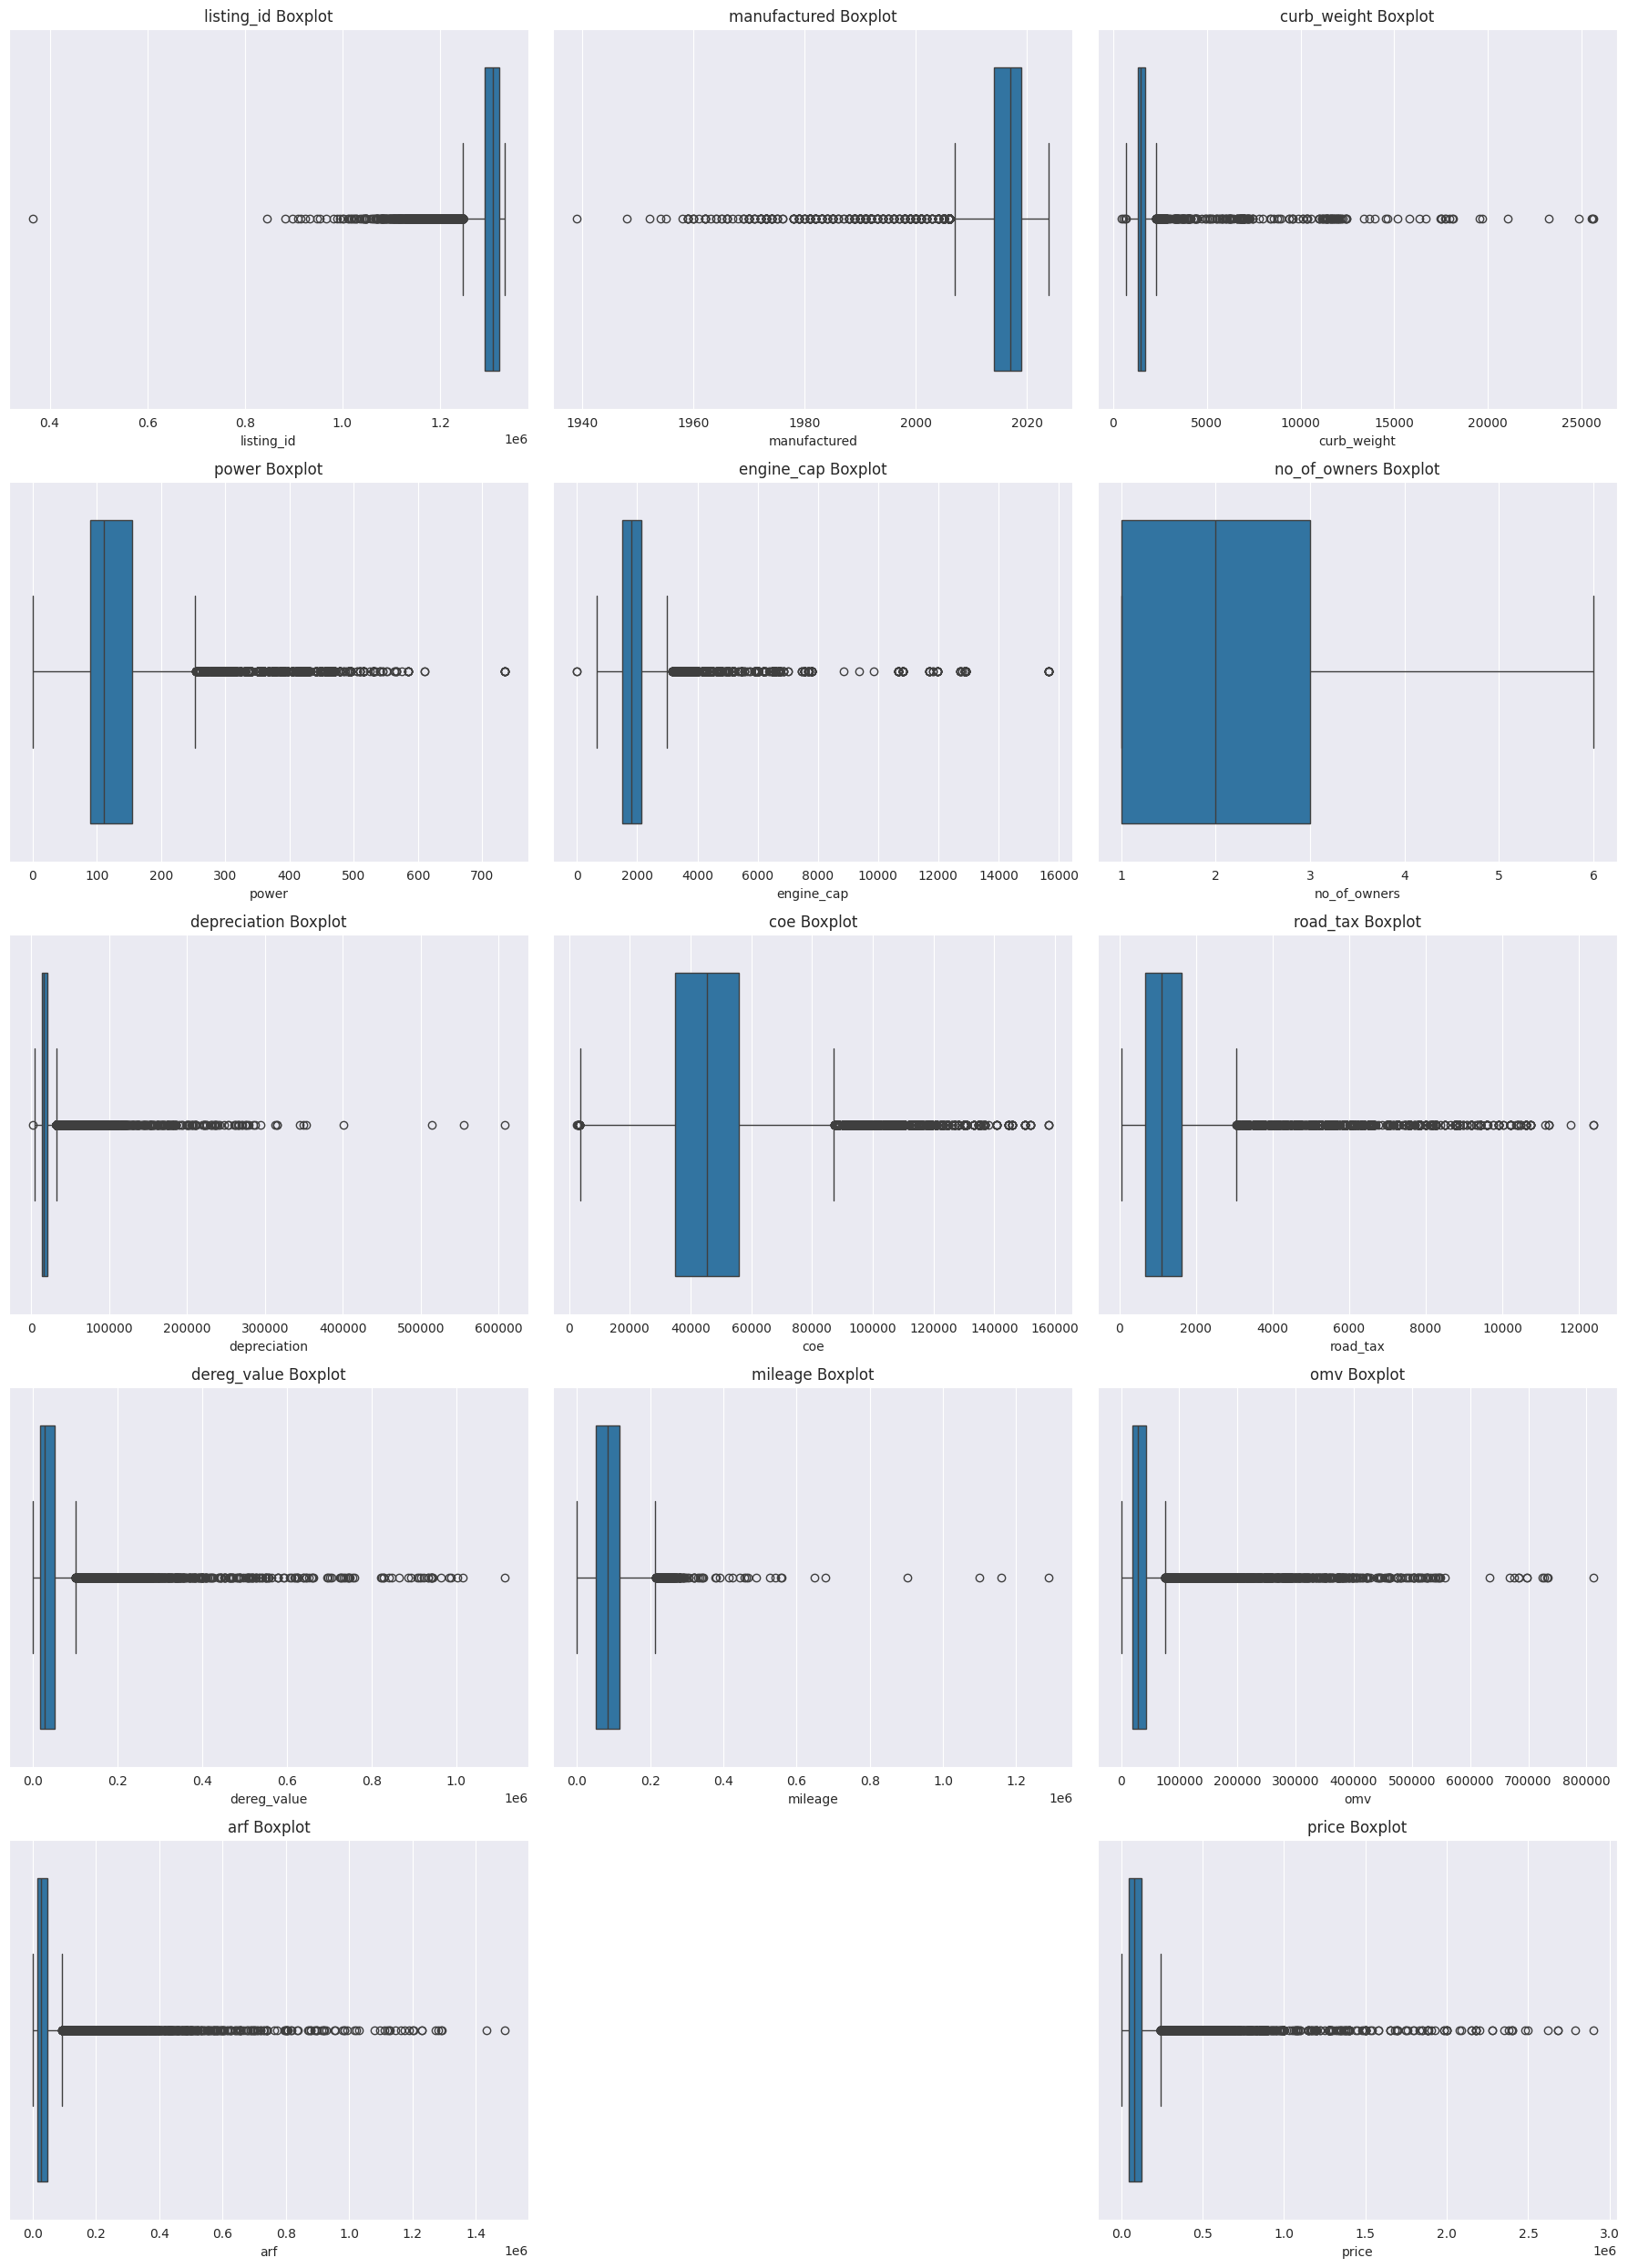

In [128]:
numerical_features = data.select_dtypes(include=["int64", "float64"]).columns

ncols = 3
n_distribution_rows = (len(numerical_features) // ncols) + (
    len(numerical_features) % ncols > 0
)
n_boxplot_rows = n_distribution_rows

plt.figure(figsize=(18, n_distribution_rows * 5))
for i, col in enumerate(numerical_features, 1):
    col_data = data[col].dropna()

    if col_data.empty:
        print(f"Column '{col}' is empty after dropping NaNs.")
        continue

    plt.subplot(n_distribution_rows, ncols, i)
    sns.histplot(col_data, kde=True)
    plt.title(f"{col} Distribution")

plt.tight_layout()
plt.show()

plt.figure(figsize=(18, n_boxplot_rows * 5))
for i, col in enumerate(numerical_features, 1):
    col_data = data[col].dropna()

    if col_data.empty:
        continue

    plt.subplot(n_boxplot_rows, ncols, i)
    sns.boxplot(x=col_data)
    plt.title(f"{col} Boxplot")

plt.tight_layout()
plt.show()

3.2 Classification Features

Draw a bar chart:

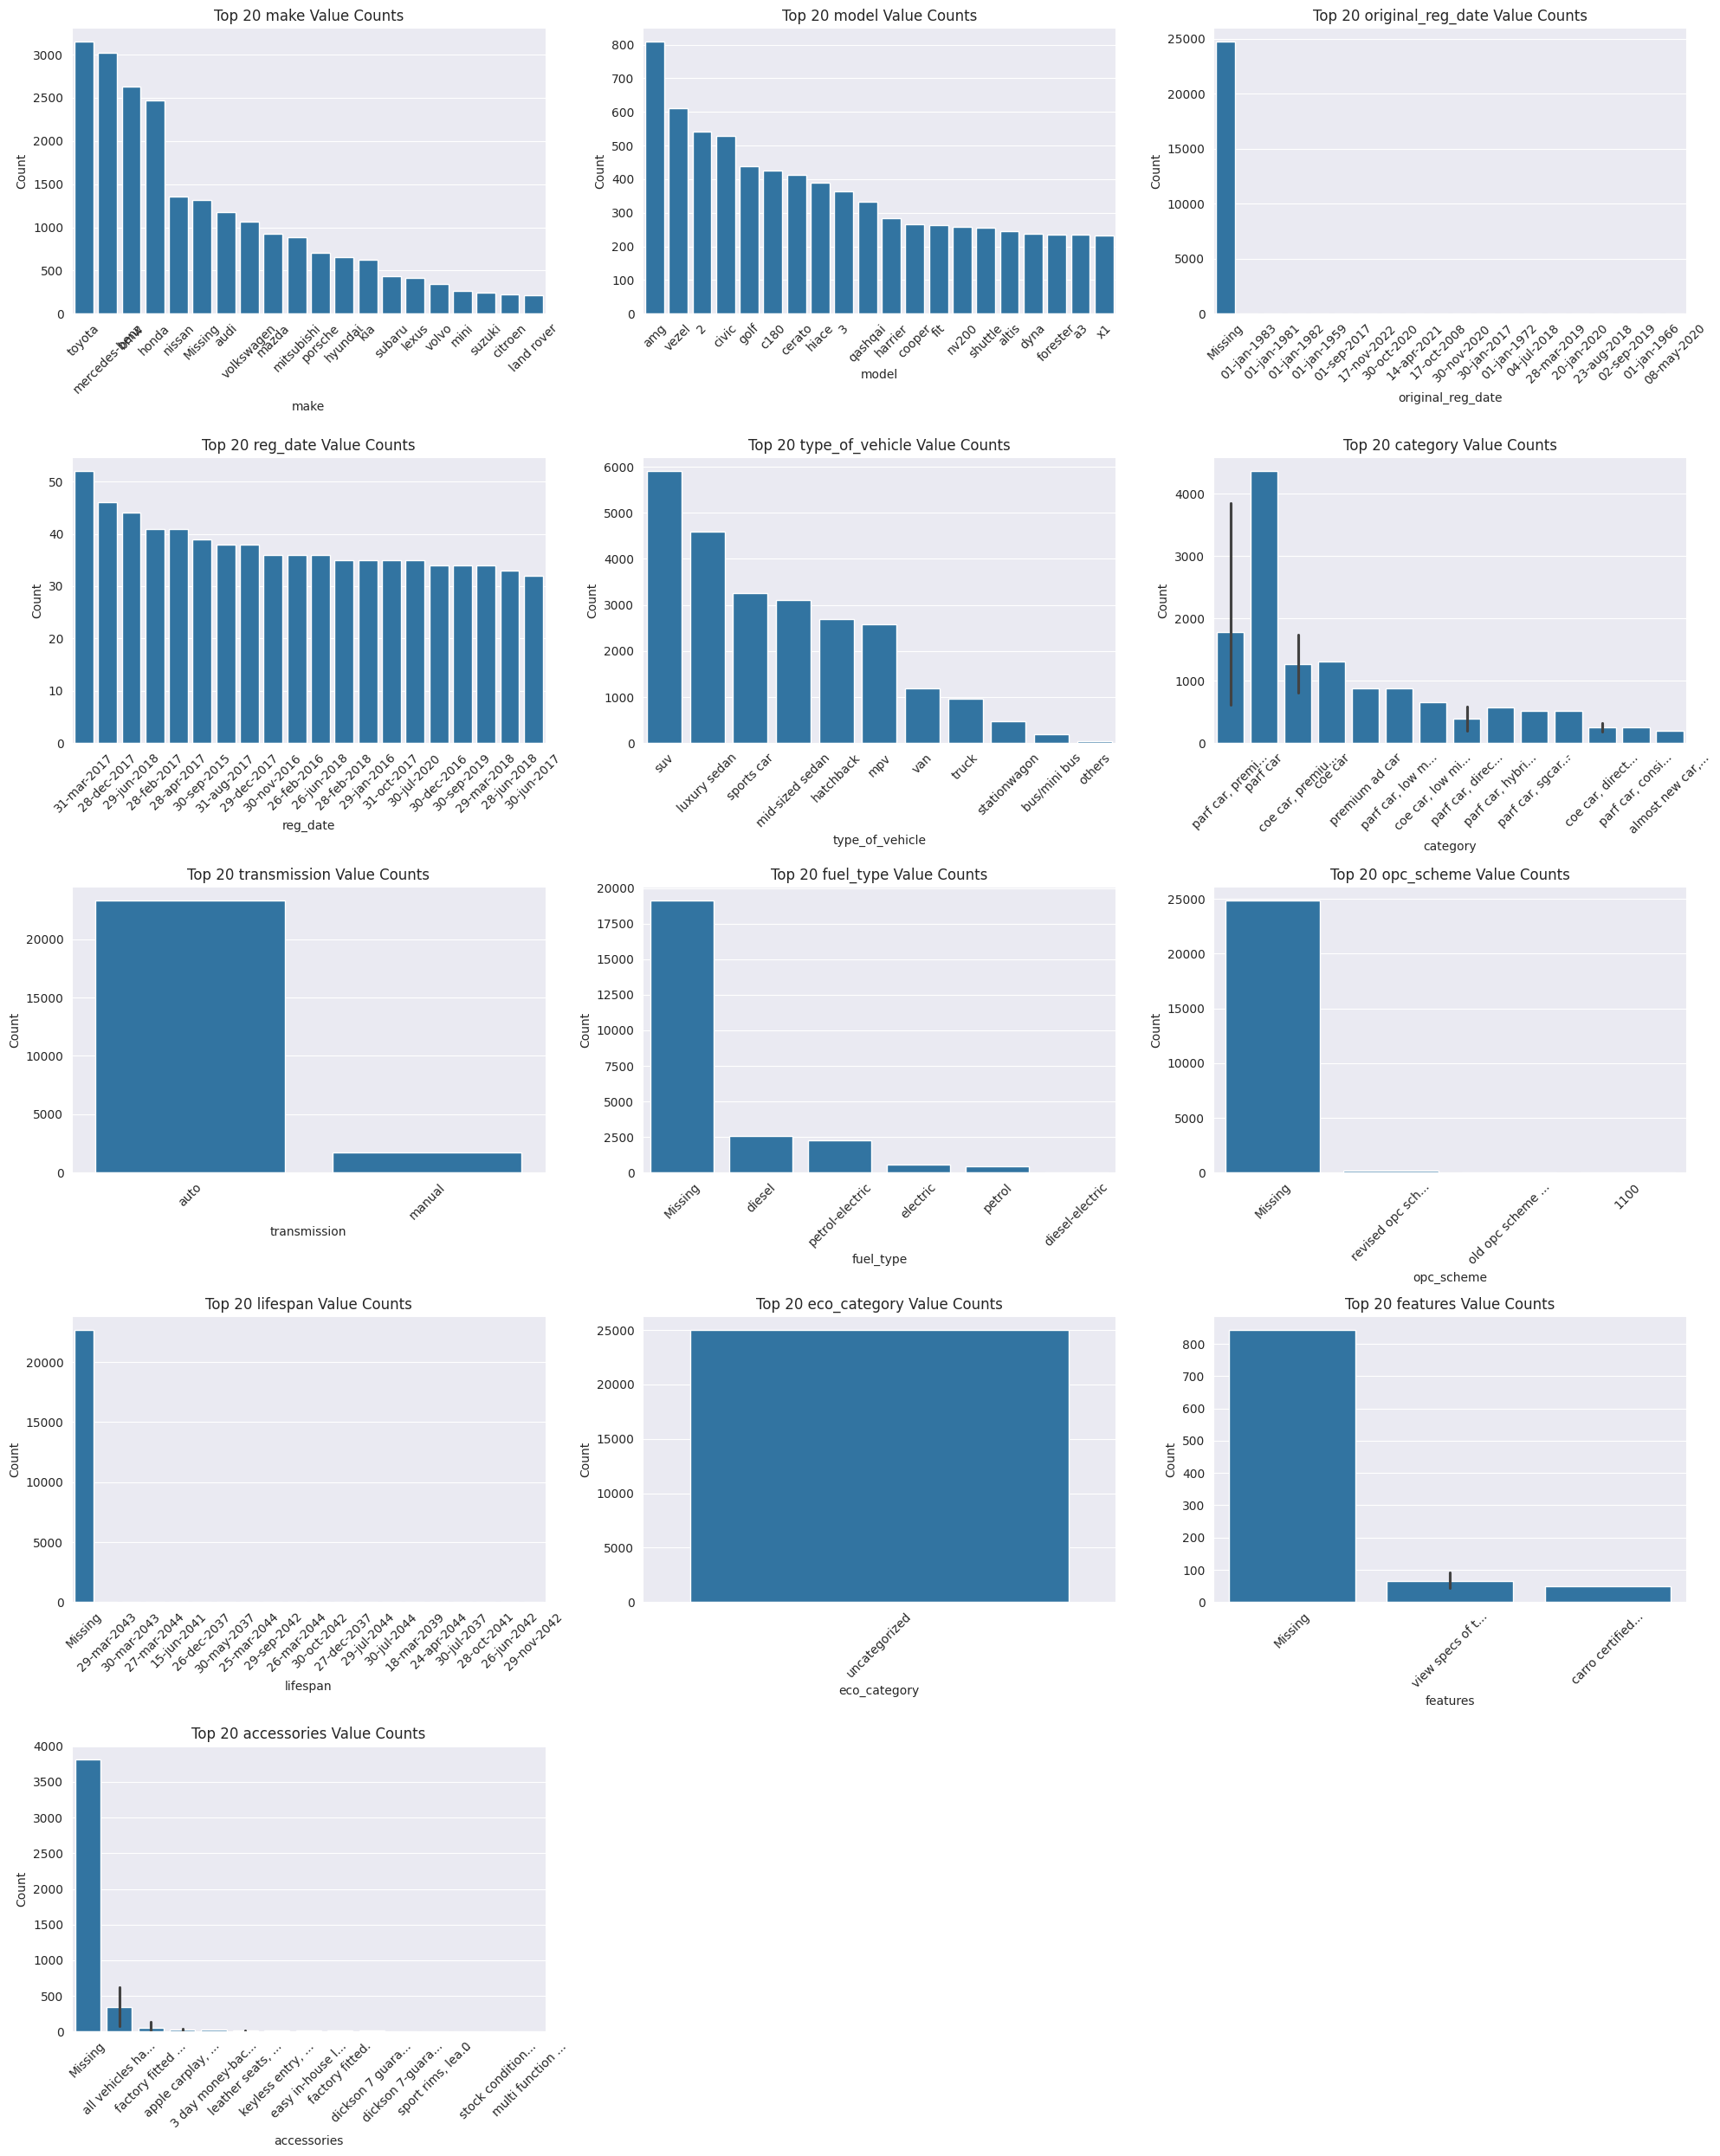

In [129]:
exclude_features = ["description", "title"]
categorical_features = [
    col
    for col in data.select_dtypes(include=["object"]).columns
    if col not in exclude_features
]

num_plots = len(categorical_features)
ncols = 3
nrows = (num_plots // ncols) + (num_plots % ncols > 0)

fig, axes = plt.subplots(nrows, ncols, figsize=(20, nrows * 5))
axes = axes.flatten()

for i, col in enumerate(categorical_features):
    data[col] = data[col].fillna("Missing")

    top_categories = data[col].value_counts().nlargest(20)

    truncated_labels = [
        label[:15] + "..." if len(label) > 15 else label
        for label in top_categories.index
    ]

    sns.barplot(x=truncated_labels, y=top_categories.values, ax=axes[i])
    axes[i].set_title(f"Top 20 {col} Value Counts")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Count")
    axes[i].tick_params(axis="x", rotation=45)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

*4.1* Relationship between numerical features and target variables

To draw a scatter plot:

Target variable 'price' exists in the dataset.


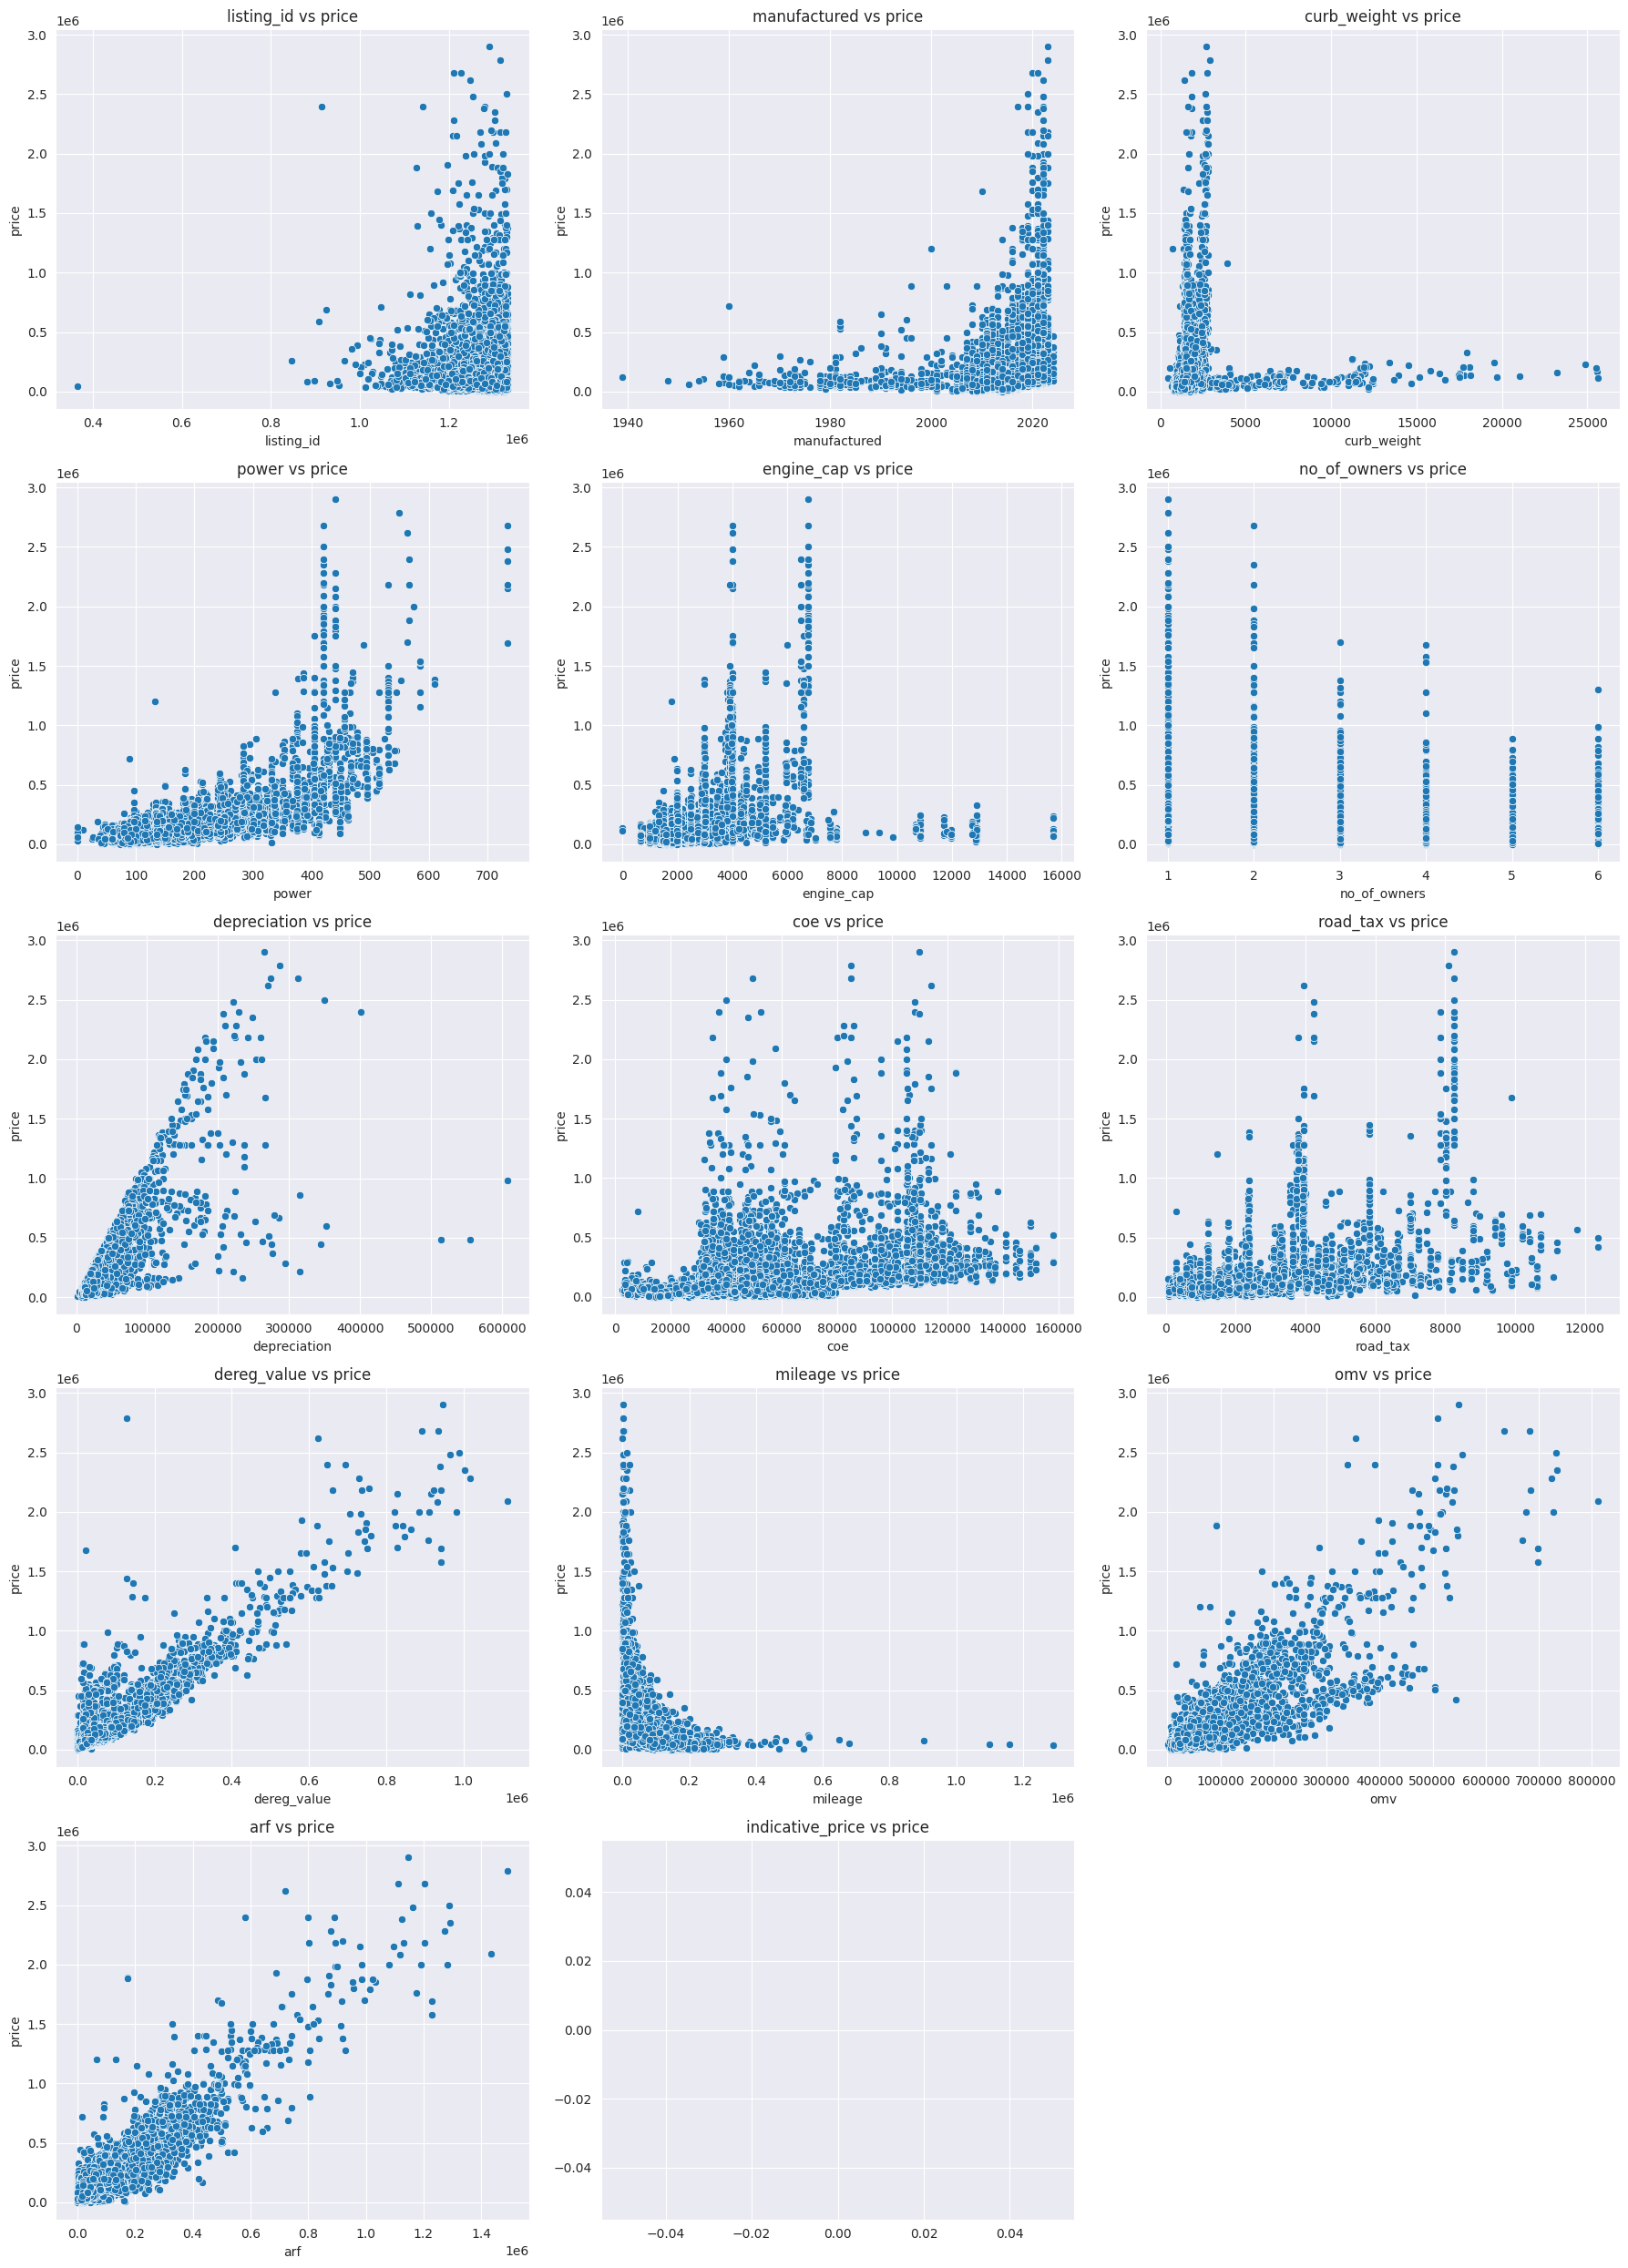

In [130]:
target = "price"

if target in data.columns:
    print(f"Target variable '{target}' exists in the dataset.")
else:
    print(
        f"Target variable '{target}' does not exist in the dataset. Please check the column name."
    )

if data[target].dtype not in ["int64", "float64"]:
    data[target] = data[target].astype(str)
    data[target] = data[target].str.replace(",", "").str.replace("$", "").astype(float)

missing_price = data[target].isnull().sum()
if missing_price > 0:
    data = data.dropna(subset=[target])

numerical_features = data.select_dtypes(include=["int64", "float64"]).columns.tolist()
if target in numerical_features:
    numerical_features.remove(target)

ncols = 3
nrows = (len(numerical_features) // ncols) + (
    len(numerical_features) % ncols > 0
)  # 计算行数
fig, axes = plt.subplots(nrows, ncols, figsize=(18, nrows * 5))
axes = axes.flatten()

for i, col in enumerate(numerical_features):
    sns.scatterplot(x=data[col], y=data[target], ax=axes[i])
    axes[i].set_title(f"{col} vs {target}")

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

4.2 Relationship between classification features and target variables

To draw a box diagram:

/tmp/ipykernel_30391/2952605323.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45, ha="right")
/tmp/ipykernel_30391/2952605323.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45, ha="right")
/tmp/ipykernel_30391/2952605323.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45, ha="right")
/tmp/ipykernel_30391/2952605323.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45, ha="right")
/tmp/ipykernel_30391

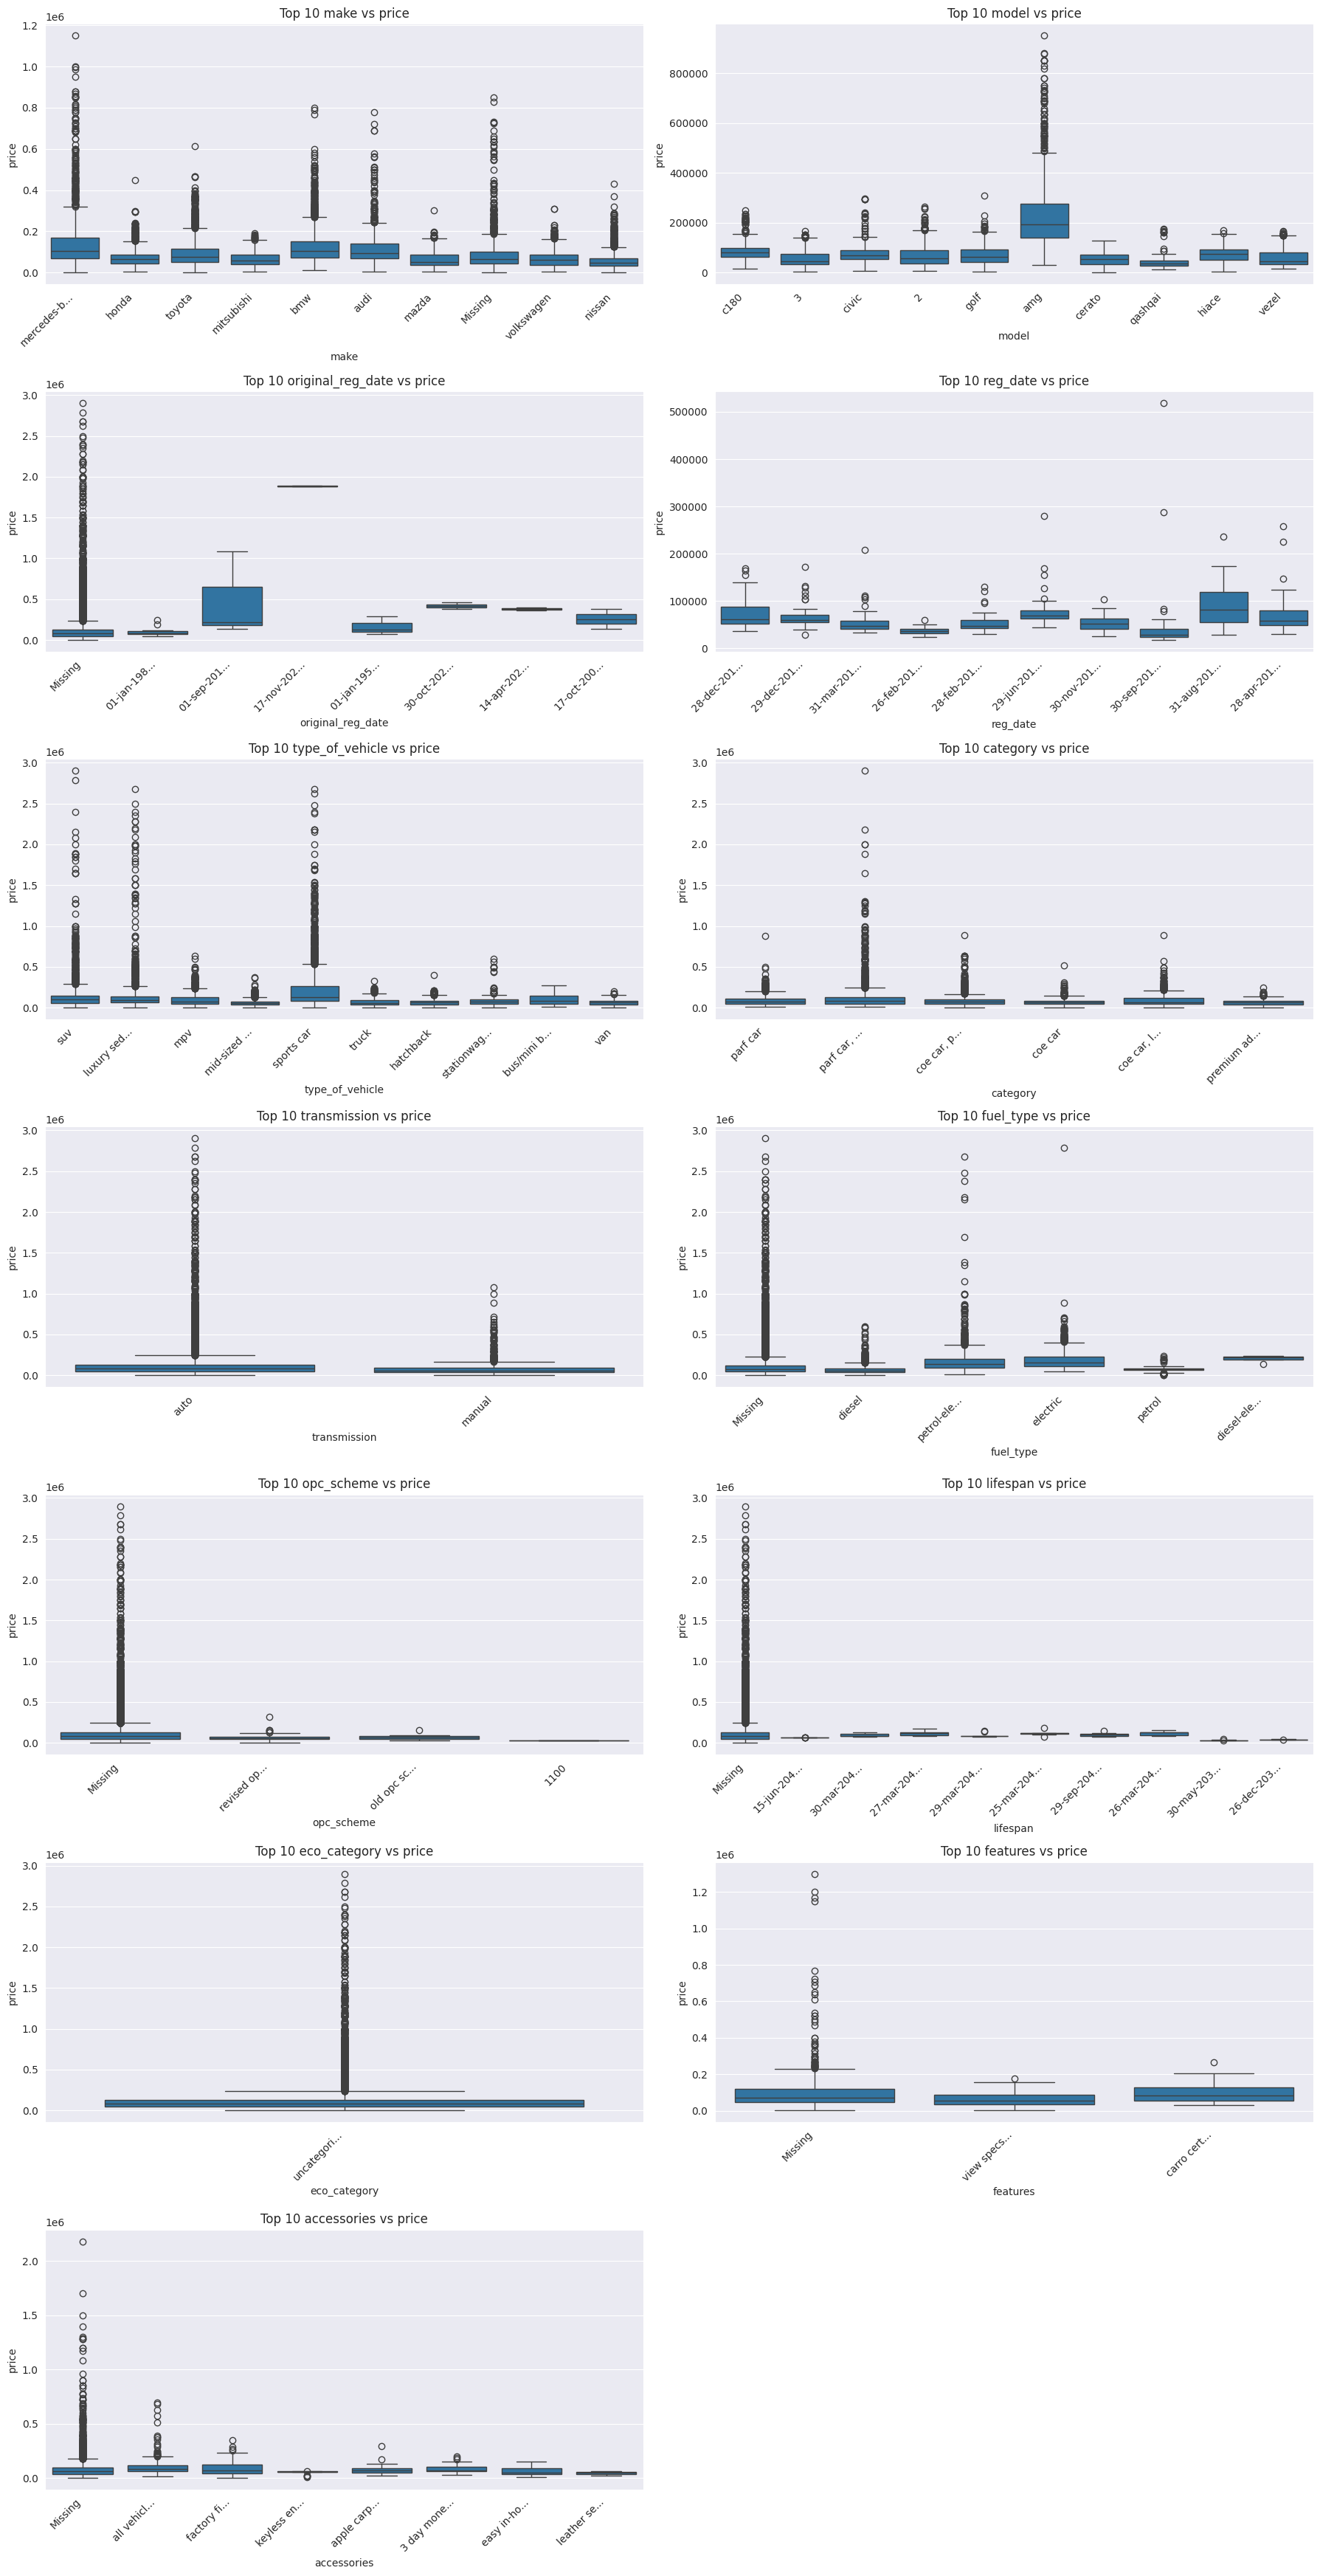

In [131]:
top_n = 10
ncols = 2
nrows = (len(categorical_features) // ncols) + (
    len(categorical_features) % ncols > 0
)  # 计算行数

fig, axes = plt.subplots(nrows, ncols, figsize=(18, nrows * 5))
axes = axes.flatten()

for i, col in enumerate(categorical_features):
    top_categories = data[col].value_counts().index[:top_n]
    data_subset = data[data[col].isin(top_categories)]

    data_subset = data[data[col].isin(top_categories)].copy()
    data_subset[col] = data_subset[col].apply(
        lambda x: str(x)[:10] + "..." if len(str(x)) > 10 else x
    )

    sns.boxplot(x=data_subset[col], y=data_subset[target], ax=axes[i])
    axes[i].set_title(f"Top {top_n} {col} vs {target}")
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45, ha="right")

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

4.3 Correlation analysis



Calculate the correlation matrix and draw a heat map:




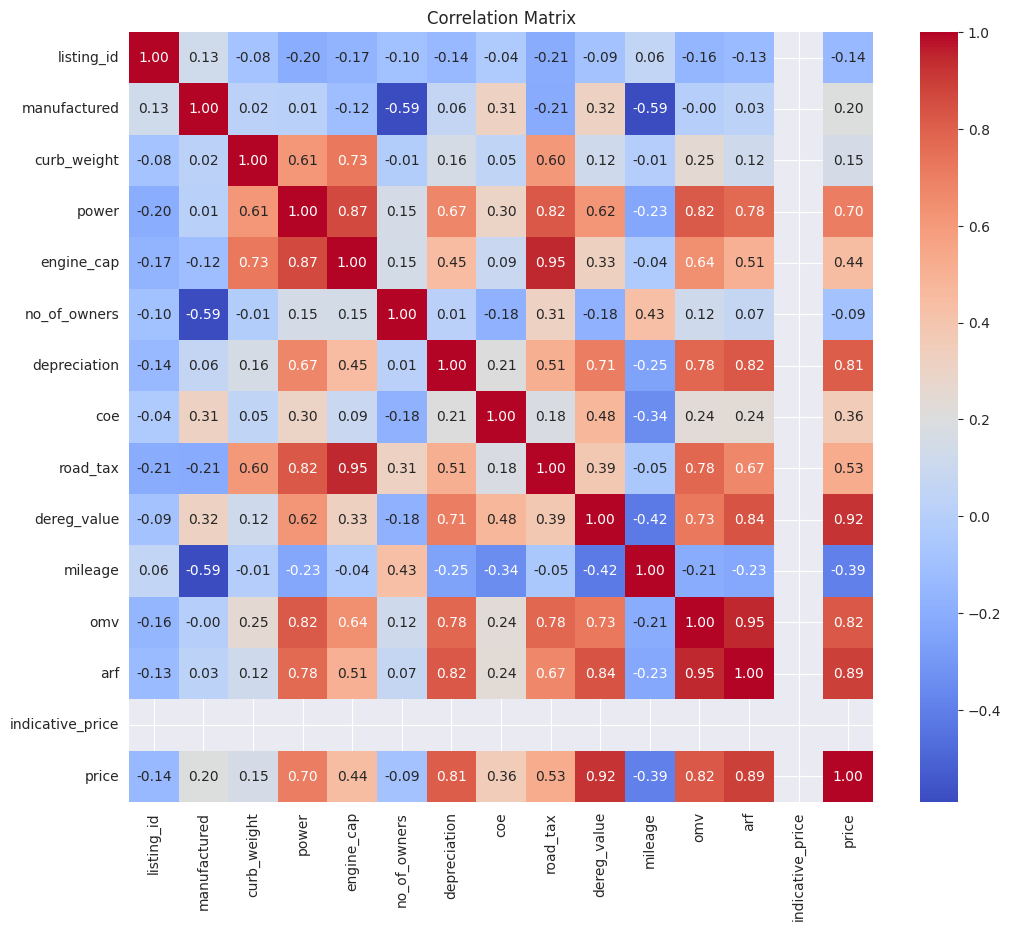

In [132]:
import numpy as np

numeric_data = data.select_dtypes(include=[np.number])
corr_matrix = numeric_data.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

5.1 Feature Process

Data Loading and Merging for Training and Testing Datasets








In [133]:
# Load data
train_data = pd.read_csv("train.csv", index_col="listing_id")
test_data = pd.read_csv("test.csv", index_col="listing_id")
train_index = train_data.index
test_index = test_data.index

merge_data = pd.concat([train_data, test_data], axis=0).drop(columns=["price"])

Dropping Irrelevant Columns from Merged Dataset







In [134]:
merge_data = merge_data.drop(
    columns=["title", "description", "features", "accessories"]
)

Removing Columns with High Missing Values








In [135]:
# Remove those almost na cols.
def remove_high_na_columns(data: pd.DataFrame, threshold=0.3):
    na_rate = data.isna().mean()
    high_na_columns = na_rate[na_rate > threshold]
    print(f"Removing columns with high missing values:\n{high_na_columns}")
    data = data.drop(columns=high_na_columns.index)
    return data


merge_data = remove_high_na_columns(merge_data)
merge_data.info()

Removing columns with high missing values:
original_reg_date    0.989943
fuel_type            0.764886
opc_scheme           0.994029
lifespan             0.905629
indicative_price     1.000000
dtype: float64
<class 'pandas.core.frame.DataFrame'>
Index: 35000 entries, 1292132 to 1311711
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   make             33143 non-null  object 
 1   model            35000 non-null  object 
 2   manufactured     34990 non-null  float64
 3   reg_date         35000 non-null  object 
 4   type_of_vehicle  35000 non-null  object 
 5   category         35000 non-null  object 
 6   transmission     35000 non-null  object 
 7   curb_weight      34583 non-null  float64
 8   power            31274 non-null  float64
 9   engine_cap       34169 non-null  float64
 10  no_of_owners     34974 non-null  float64
 11  depreciation     34292 non-null  float64
 12  coe              35000 non-null

Removing Columns with Single Unique Value








In [136]:
# Remove those cols with all the same values.
def remove_one_value_columns(data: pd.DataFrame):
    duplicate_rate = data.apply(lambda col: col.nunique())
    high_duplicate_columns = duplicate_rate[duplicate_rate == 1]
    print(f"Removing columns with high duplicate values:\n{high_duplicate_columns}")
    data = data.drop(columns=high_duplicate_columns.index)
    return data


merge_data = remove_one_value_columns(merge_data)
merge_data.info()

Removing columns with high duplicate values:
eco_category    1
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 35000 entries, 1292132 to 1311711
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   make             33143 non-null  object 
 1   model            35000 non-null  object 
 2   manufactured     34990 non-null  float64
 3   reg_date         35000 non-null  object 
 4   type_of_vehicle  35000 non-null  object 
 5   category         35000 non-null  object 
 6   transmission     35000 non-null  object 
 7   curb_weight      34583 non-null  float64
 8   power            31274 non-null  float64
 9   engine_cap       34169 non-null  float64
 10  no_of_owners     34974 non-null  float64
 11  depreciation     34292 non-null  float64
 12  coe              35000 non-null  int64  
 13  road_tax         31286 non-null  float64
 14  dereg_value      34697 non-null  float64
 15  mileage          27530 no

Processing Registration Date and Manufactured Year







In [137]:
# Process reg and manufactured
merge_data["reg_date"] = pd.to_datetime(merge_data["reg_date"], format=r"%d-%b-%Y")
merge_data["reg_year"] = merge_data["reg_date"].dt.year
merge_data = merge_data.drop(columns=["reg_date", "manufactured"])

Filling Missing Values in Make Column Based on Model








In [138]:
# fill missing make value


def process_make(data: pd.DataFrame):
    data["make"] = data["make"].fillna("unknown")

    model_with_unknown_make = data.loc[data["make"] == "unknown", "model"].unique()
    model_make_map = (
        data[
            (data["model"].isin(model_with_unknown_make)) & (data["make"] != "unknown")
        ]
        .drop_duplicates("model")
        .set_index("model")["make"]
        .to_dict()
    )
    loc_to_fill = data["make"] == "unknown"
    data.loc[loc_to_fill, "make"] = data.loc[loc_to_fill, "model"].map(model_make_map)

    print("Filled missing values in make column")

    return data


merge_data = process_make(merge_data)
merge_data.info()

Filled missing values in make column
<class 'pandas.core.frame.DataFrame'>
Index: 35000 entries, 1292132 to 1311711
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   make             35000 non-null  object 
 1   model            35000 non-null  object 
 2   type_of_vehicle  35000 non-null  object 
 3   category         35000 non-null  object 
 4   transmission     35000 non-null  object 
 5   curb_weight      34583 non-null  float64
 6   power            31274 non-null  float64
 7   engine_cap       34169 non-null  float64
 8   no_of_owners     34974 non-null  float64
 9   depreciation     34292 non-null  float64
 10  coe              35000 non-null  int64  
 11  road_tax         31286 non-null  float64
 12  dereg_value      34697 non-null  float64
 13  mileage          27530 non-null  float64
 14  omv              34907 non-null  float64
 15  arf              34761 non-null  float64
 16  reg_year         3

Extracting Tag-Like Variables and Converting to Dummy Variables








In [139]:
# Notice that type_of_vehicle, category, transmission three variables are like tags, extract and convert them to dummies.


def process_type_of_vehicle(data: pd.DataFrame):
    type_of_vehicle = data["type_of_vehicle"].str.get_dummies()
    data = pd.concat([data, type_of_vehicle], axis=1)
    data = data.drop(columns=["type_of_vehicle"])
    print(f"type_of_vehicle col is extracted to {len(type_of_vehicle.columns)} cols")
    return data


def process_category(data: pd.DataFrame):
    category = data["category"].str.get_dummies(sep=", ")
    data = pd.concat([data, category], axis=1)
    data = data.drop(columns=["category"])

    print(f"category col is extracted to {len(category.columns)} cols")

    return data


def process_transmission(data: pd.DataFrame):
    transmission = data["transmission"].str.get_dummies()
    data = pd.concat([data, transmission], axis=1)
    data = data.drop(columns=["transmission"])
    print(f"transmission col is extracted to {len(transmission.columns)} cols")
    return data


def process_make_model(data: pd.DataFrame):
    make = data["make"].str.get_dummies()
    data = pd.concat([data, make], axis=1)
    data = data.drop(columns=["make", "model"])
    print(f"make col is extracted to {len(make.columns)} cols")
    return data


merge_data = process_type_of_vehicle(merge_data)
merge_data = process_category(merge_data)
merge_data = process_transmission(merge_data)

# process make, here different tries.
# merge_data = merge_data.drop(columns=['make', 'model'])
merge_data_hierarchical = merge_data.copy()
merge_data = process_make_model(merge_data)

type_of_vehicle col is extracted to 11 cols
category col is extracted to 16 cols
transmission col is extracted to 2 cols
make col is extracted to 98 cols


Removing Unrealistically High Annual Mileage Records








In [140]:
# The average annual driving distance is more than 10w miles, which is kind of crazy
high_mileage_indices = merge_data[
    ((merge_data["mileage"] / (2025 - merge_data["reg_year"])) > 1e5)
].index
merge_data = merge_data.drop(high_mileage_indices)
merge_data_hierarchical = merge_data_hierarchical.drop(high_mileage_indices)

In [141]:
merge_data_hierarchical.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34997 entries, 1292132 to 1311711
Data columns (total 43 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   make                     34997 non-null  object 
 1   model                    34997 non-null  object 
 2   curb_weight              34580 non-null  float64
 3   power                    31271 non-null  float64
 4   engine_cap               34166 non-null  float64
 5   no_of_owners             34971 non-null  float64
 6   depreciation             34289 non-null  float64
 7   coe                      34997 non-null  int64  
 8   road_tax                 31283 non-null  float64
 9   dereg_value              34694 non-null  float64
 10  mileage                  27527 non-null  float64
 11  omv                      34904 non-null  float64
 12  arf                      34758 non-null  float64
 13  reg_year                 34997 non-null  int32  
 14  bus/mini bus       

Hierarchical and Direct Imputation of Missing Numerical Values








In [142]:
# Import necessary libraries for imputation
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
import numpy as np

# Initialize the Iterative Imputer
iterative_imputer = IterativeImputer(
    max_iter=20, random_state=0, keep_empty_features=True, verbose=1
)

# Select numerical features for imputation
numeric_feats = merge_data.select_dtypes(include=[np.number]).columns


# Custom hierarchical imputation based on make and model groups
def custom_impute_by_make(data):
    # Step 1: Impute within each (make, model) group
    for (make, model), group in data.groupby(["make", "model"]):
        if len(group) >= 10:  # Check if the group size is sufficient
            available_feats = [feat for feat in numeric_feats if feat in group.columns]
            imputed_values = iterative_imputer.fit_transform(group[available_feats])
            data.loc[group.index, available_feats] = imputed_values

    # Step 2: Impute within each make group for remaining missing values
    for make, group in data.groupby("make"):
        if len(group) >= 10:  # Check if the group size is sufficient
            missing_indices = group[group.isnull().any(axis=1)].index
            if not missing_indices.empty:
                available_feats = [feat for feat in numeric_feats if feat in group.columns]
                imputed_values = iterative_imputer.fit_transform(group[available_feats])
                data.loc[group.index, available_feats] = imputed_values

    # Step 3: Impute globally for any remaining missing values
    remaining_na_indices = data[data.isnull().any(axis=1)].index
    if not remaining_na_indices.empty:
        available_feats = [feat for feat in numeric_feats if feat in data.columns]
        imputed_values = iterative_imputer.fit_transform(data[available_feats])
        
        # Only select the rows for remaining_na_indices to match the shapes
        imputed_values_filtered = imputed_values[data.index.isin(remaining_na_indices)]
        data.loc[remaining_na_indices, available_feats] = imputed_values_filtered

    return data



# Apply either hierarchical or direct imputation
data_imputed_hierarchical = pd.DataFrame(
    custom_impute_by_make(merge_data_hierarchical),
    columns=merge_data_hierarchical.columns,
    index=merge_data_hierarchical.index,
)

data_imputed_direct = pd.DataFrame(
    iterative_imputer.fit_transform(merge_data),
    columns=merge_data.columns,
    index=merge_data.index,
)


Preparing Data for Model Training and Feature Selection








In [144]:
# Training model

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from tqdm import tqdm

valid_train_index = train_index.intersection(data_imputed_direct.index)
X = data_imputed_direct.loc[valid_train_index]
y = train_data.loc[valid_train_index]["price"]

# Filter variable
selected_feats = X.corrwith(y) > 0.05
selected_feats = selected_feats[selected_feats].index

X = X[selected_feats]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

/home/ayhh/miniconda3/envs/v/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/ayhh/miniconda3/envs/v/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:3000: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Training and Evaluating Linear Regression Model








In [145]:
# Linear Model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred = lr_model.predict(X_test)
print(f"LR RMSE: {mean_squared_error(y_test, y_pred)**0.5}")

LR RMSE: 43720.17317925063


Training and Evaluating Random Forest Regression Model

In [146]:
# Random Forest Model
rf_model = RandomForestRegressor(n_estimators=1000, n_jobs=-1, verbose=1)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
print(f"RF RMSE: {mean_squared_error(y_test, y_pred)**0.5}")

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done 768 tasks      | elapsed:    7.5s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:    9.6s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.2s


RF RMSE: 27011.838099382312


[Parallel(n_jobs=16)]: Done 768 tasks      | elapsed:    0.3s
[Parallel(n_jobs=16)]: Done 1000 out of 1000 | elapsed:    0.4s finished


Training and Evaluating XGBoost Regression Model

In [147]:
# XGBoost
xgb_model = XGBRegressor(
    n_estimators=2000,
    learning_rate=0.01,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    verbosity=1,
    random_state=42,
    n_jobs=-1,
)
xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)
print(f"XGBoost RMSE: {mean_squared_error(y_test, y_pred)**0.5}")

XGBoost RMSE: 25700.883924409853


Training and Evaluating Hierarchical Random Forest Model

In [149]:
import warnings
warnings.filterwarnings("ignore")
class HierarchicalRandomForest:
    def __init__(self, min_group_size=10):

        self.min_group_size = min_group_size

        self.make_model_models = {}  # Store (make, model) level models
        self.make_models = {}  # Store make level models
        self.global_model = None  # Global model
        self.feature_cols = None  # Feature columns

    def fit(self, X_train, y_train):

        # Step 1: (make, model) level
        grouped = X_train.groupby(["make", "model"])
        for (make, model), group in grouped:
            if len(group) >= self.min_group_size:
                group_index = group.index

                model_rf = RandomForestRegressor()
                model_rf.fit(
                    X_train.loc[group_index].drop(columns=["make", "model"]),
                    y_train.loc[group_index],
                )
                self.make_model_models[(make, model)] = model_rf

        # Step 2: make level
        grouped_make = X_train.groupby("make")
        for make, group in grouped_make:
            if len(group) >= self.min_group_size and make not in self.make_models:
                group_index = group.index

                model_rf = RandomForestRegressor()
                model_rf.fit(
                    X_train.loc[group_index].drop(columns=["make", "model"]),
                    y_train.loc[group_index],
                )
                self.make_models[make] = model_rf

        # Step 3: global model
        self.global_model = RandomForestRegressor()
        self.global_model.fit(X_train.drop(columns=["make", "model"]), y_train)

    def predict(self, test_data):

        predictions = []
        for idx, row in test_data.iterrows():
            make = row["make"]
            model = row["model"]

            if (make, model) in self.make_model_models:
                model_to_use = self.make_model_models[(make, model)]
            elif make in self.make_models:
                model_to_use = self.make_models[make]
            else:
                model_to_use = self.global_model

            X_row = row.drop(columns=["make", "model"]).values.reshape(1, -1)[:, 2:]
            pred = model_to_use.predict(X_row)[0]
            predictions.append(pred)

        return predictions

valid_train_index = train_index.intersection(data_imputed_hierarchical.index)
X = data_imputed_hierarchical.loc[valid_train_index]
y = train_data.loc[valid_train_index]["price"]


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


hrf_model = HierarchicalRandomForest(min_group_size=10)
hrf_model.fit(X_train, y_train)
y_pred = hrf_model.predict(X_test)
print(f"HRF RMSE: {mean_squared_error(y_test, y_pred)**0.5}")

HRF RMSE: 30151.64521391711


Generating and Saving Model Prediction Results for Submission








In [ ]:
# Upload results

# y_pred = model.predict(merge_data.loc[test_index].drop(columns=["make", "model"]))

y_pred = hrf_model.predict(merge_data_hierarchical.loc[test_index])

def save_submission(y_pred, filename="submission.csv"):
    output = pd.DataFrame({"Id": range(len(y_pred)), "Predicted": y_pred})
    output.to_csv(filename, index=False)


save_submission(y_pred, "submission_hrf.csv")